In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.append(os.path.abspath('..'))

from log_processing import process_log

In [2]:
file = "../../backtests/test.log"
trader_data, products_data, activities, trades = process_log(file)

In [3]:
kelp = products_data["KELP"]
kelp

,product,orders,timestamp,position,mm_price,mm_spread,vwap,fair_value
0,KELP,"[[20, 2029], [-20, 2031]]",0,0,2030.0,4.0,2030.00,2030.00
1,KELP,"[[20, 2029], [-20, 2031]]",100,0,2030.0,4.0,2030.11,2030.00
2,KELP,"[[20, 2029], [-20, 2031]]",200,0,2030.0,4.0,2030.02,2030.00
3,KELP,"[[20, 2029], [-20, 2031]]",300,0,2030.5,3.0,2030.50,2030.31
4,KELP,"[[20, 2029], [-20, 2031]]",400,6,2030.0,4.0,2029.85,2030.12
...,...,...,...,...,...,...,...,...
9995,KELP,"[[-20, 2034]]",999500,50,2033.5,3.0,2033.50,2033.50
9996,KELP,"[[-20, 2034]]",999600,50,2033.5,3.0,2033.50,2033.50
9997,KELP,"[[-1, 2034], [-20, 2034]]",999700,50,2033.5,3.0,2033.54,2033.50
9998,KELP,"[[1, 2032], [-20, 2034]]",999800,49,2033.5,3.0,2033.48,2033.50


<Axes: >

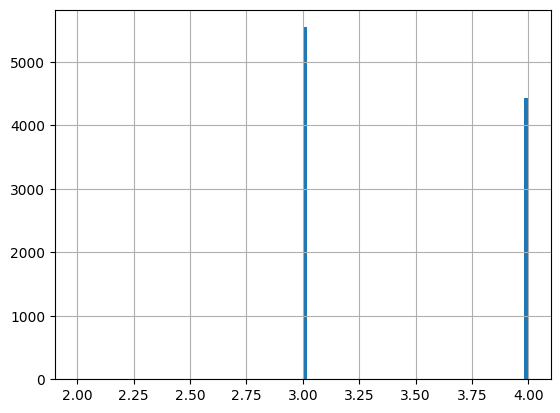

In [12]:
mm_price = kelp["mm_price"]
mm_spread = kelp["mm_spread"]

mm_spread.hist(bins=100)